## Learn patterns in CITES Manidae subset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('manidae.csv')
df.head()

id  year appendix       taxon     class        ord   family  genus  \
0  326704  1979       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis   
1  326710  1981       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis   
2  326711  1981       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis   
3  326712  1981       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis   
4  326713  1981       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis   

            term  quantity     unit importer exporter origin purpose source  \
0          skins     356.0      NaN       US       ES     XX       T    NaN   
1    skin pieces       1.0  cartons       HK       XX    NaN     NaN      I   
2          shoes       1.0      NaN       US       XX     TH       P    NaN   
3          shoes       2.0      NaN       US       XX     TH       P    NaN   
4  leather items       2.0      NaN       US       XX     TH       P    NaN   

  reporter_type import_permit_randomid export_permit_randomid  \
0             I                    NaN                    NaN   
1             I                    NaN                    NaN   
2             I                    NaN                    NaN   
3             I                    NaN                    NaN   
4             I                    NaN                    NaN   

  origin_permit_randomid  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

## Scales
* 132 records
* Non-measuable records are ignored (unit is not 'g' / 'kg')
* Unit of scales are unified as 'kg'

In [3]:
# df_scales = df[df['term'] == 'scales']
# df_scales = df_scales[['year', 'quantity', 'unit', 'importer', 'exporter','origin', 'purpose','source', 'reporter_type']]
# df_scales = df_scales[df_scales['unit'].isin(['g', 'kg'])]
# df_scales.head()

In [4]:
scales_import = pd.read_csv('subsets/df_scales_weight_import_kg.csv')
scales_export = pd.read_csv('subsets/df_scales_weight_export_kg.csv')
len(scales_import) + len(scales_export)

132

In [5]:
scales_all = pd.concat([scales_import, scales_export]).reset_index().drop(['index', 'Unnamed: 0'], axis=1)
scales_all.head()

year appendix       taxon     class        ord   family  genus    term  \
0  1997       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis  scales   
1  1999       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis  scales   
2  1999       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis  scales   
3  1999       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis  scales   
4  2001       II  Manis spp.  Mammalia  Pholidota  Manidae  Manis  scales   

  importer exporter origin purpose source reporter_type unit  quantity  
0       KR       XX    NaN       L      U             I   kg   366.000  
1       US       LA    NaN     NaN      I             I   kg     0.109  
2       US       LA     XX     NaN      I             I   kg     0.043  
3       US       LA     XX       P      I             I   kg     0.032  
4       US       LA    NaN       P      I             I   kg     0.022

In [6]:
sum_import = scales_all.groupby('importer').sum()['quantity']
sum_import

importer
AU        0.0122
CH        0.8800
CN    38339.0000
DE        0.0500
GB        0.1400
HK    18671.2000
KR      366.0000
LA       99.0000
MY       99.0000
SG    18930.0000
TH      265.0000
TZ        2.0000
US      506.6560
VN      210.0000
ZA       55.4820
Name: quantity, dtype: float64

In [7]:
sum_export  = scales_all.groupby('exporter').sum()['quantity']
sum_export

exporter
BI    14226.7000
CD     1700.0000
CG     6500.0000
CI        0.0500
CN      502.4990
GA        0.1400
HK     1656.2190
KH        1.0000
LA        0.9530
MY    18930.0000
NL        0.8800
NZ        0.0122
SG    21454.5000
TG      385.0000
TH        0.5910
UG    11817.0000
VN        0.8760
XX      366.0000
ZA        2.0000
Name: quantity, dtype: float64

In [8]:
sum_in_ex = pd.concat([sum_import, sum_export], axis=1)
sum_in_ex.columns = ['import', 'export']
sum_in_ex = sum_in_ex.fillna(0)
sum_in_ex

import      export
AU      0.0122      0.0000
BI      0.0000  14226.7000
CD      0.0000   1700.0000
CG      0.0000   6500.0000
CH      0.8800      0.0000
CI      0.0000      0.0500
CN  38339.0000    502.4990
DE      0.0500      0.0000
GA      0.0000      0.1400
GB      0.1400      0.0000
HK  18671.2000   1656.2190
KH      0.0000      1.0000
KR    366.0000      0.0000
LA     99.0000      0.9530
MY     99.0000  18930.0000
NL      0.0000      0.8800
NZ      0.0000      0.0122
SG  18930.0000  21454.5000
TG      0.0000    385.0000
TH    265.0000      0.5910
TZ      2.0000      0.0000
UG      0.0000  11817.0000
US    506.6560      0.0000
VN    210.0000      0.8760
XX      0.0000    366.0000
ZA     55.4820      2.0000

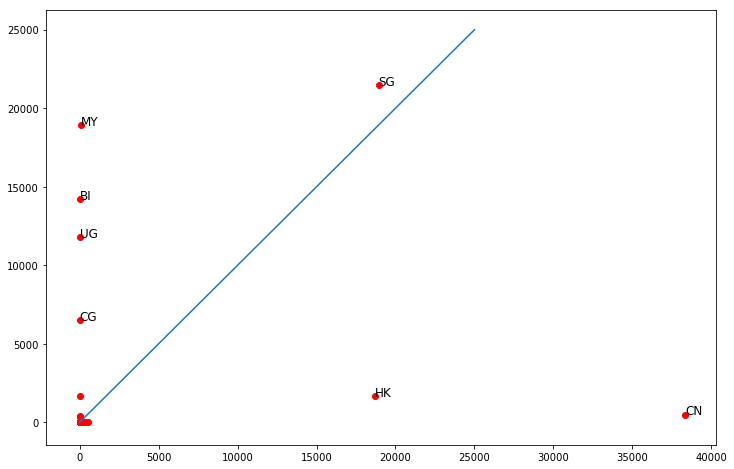

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
# plt.scatter(list(sum_in_ex['import']), list(sum_in_ex['export']))

for i, country in enumerate(list(sum_in_ex.index)):
    x = sum_in_ex['import'][i]
    y = sum_in_ex['export'][i]
    plt.scatter(x, y, marker='o', color='red')
    if x > 5000 or y > 5000:
        plt.text(x+1, y+1, country, fontsize=12)
        
plt.plot([0, 25000], [0, 25000], '-')
plt.show()

In [101]:
from sklearn.cluster import KMeans

[[    75.26101       447.87511   ]
 [ 25313.4          7871.07266667]
 [    33.          14991.23333333]]


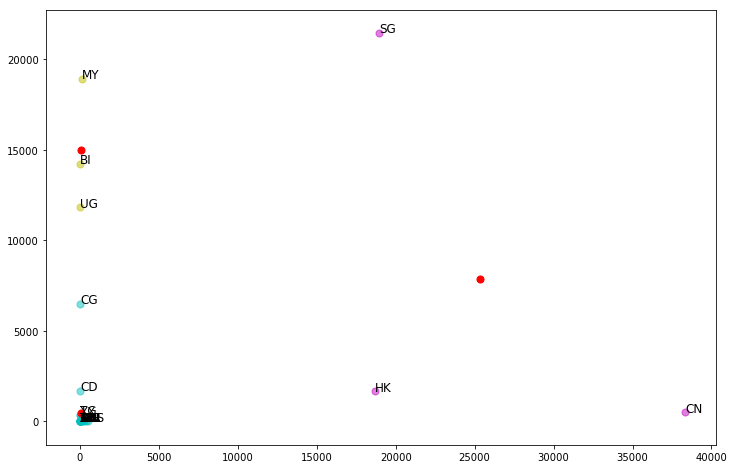

In [110]:
kmeans = KMeans(n_clusters=3).fit(sum_in_ex)
centroids = kmeans.cluster_centers_
print(centroids)
colors = ['c', 'm', 'y', 'k']

for i, country in enumerate(list(sum_in_ex.index)):
    x = sum_in_ex['import'][i]
    y = sum_in_ex['export'][i]
    plt.scatter(x, y, color=colors[kmeans.labels_[i]], s=50, alpha=0.5)
    plt.text(x+1, y+5, country, fontsize=12)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## All terms
* Total number of different kind of 'term': 26
* Total number of 'term' and 'unit' pair: 53
* Total number of coutries: 79 (nan excluded)

In [33]:
term_importer = df.groupby(['importer', 'term', 'unit'])['quantity'].sum()
term_exporter = df.groupby(['exporter', 'term', 'unit'])['quantity'].sum()
term_in_ex = pd.concat([term_importer, term_exporter], axis =1).fillna(0)
term_in_ex.columns = ['import', 'export']

In [83]:
term_in_ex.loc['CN']

import   export
derivatives boxes        0.0   2030.0
            cartons      0.0   5208.0
            g            0.0    395.0
            kg           0.0    509.0
medicine    g            0.0  11443.0
powder      g            0.0     14.0
scales      g            0.0   2499.0
            kg       38339.0    500.0
skins       kg        5000.0      0.0
unspecified g            0.0    122.0

In [84]:
import_term_kg = term_in_ex.unstack().fillna(0)
import_term_kg.head()

import                                                         \
                boxes cartons   cm flasks     g   kg    m   m2      ml pairs   
AU scales         0.0     0.0  0.0    0.0  12.2  0.0  0.0  0.0     0.0   0.0   
   specimens      0.0     0.0  0.0    0.0   0.0  0.0  0.0  0.0  2150.0   0.0   
BE derivatives    0.0    10.0  0.0    0.0   0.0  0.0  0.0  0.0     0.0   0.0   
BG derivatives    0.0     2.0  0.0    0.0   0.0  0.0  0.0  0.0     0.0   0.0   
BI scales         0.0     0.0  0.0    0.0   0.0  0.0  0.0  0.0     0.0   0.0   

                ...    export                                              \
                ...   cartons   cm flasks    g       kg    m   m2      ml   
AU scales       ...       0.0  0.0    0.0  0.0      0.0  0.0  0.0     0.0   
   specimens    ...       0.0  0.0    0.0  0.0      0.0  0.0  0.0  1200.0   
BE derivatives  ...       0.0  0.0    0.0  0.0      0.0  0.0  0.0     0.0   
BG derivatives  ...       0.0  0.0    0.0  0.0      0.0  0.0  0.0     0.0   
BI scales       ...       0.0  0.0    0.0  0.0  14226.7  0.0  0.0     0.0   

                             
               pairs pieces  
AU scales        0.0    0.0  
   specimens     0.0    0.0  
BE derivatives   0.0    0.0  
BG derivatives   0.0    0.0  
BI scales        0.0    0.0  

[5 rows x 22 columns]